In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv(r"C:\Users\nikit\Downloads\Python Folder\DataSet\Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
#replace blank sapces in total charges with 0 as the tenure was null and changed the datatype

df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df['customerID'].duplicated().sum()

np.int64(0)

In [63]:
#converting 0 and 1 to Yes/No to make it easy to understand

def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [64]:
df[['SeniorCitizen']]

,SeniorCitizen
0,No
1,No
2,No
3,No
4,No
...,...
7038,No
7039,No
7040,No
7041,Yes


# Visualization

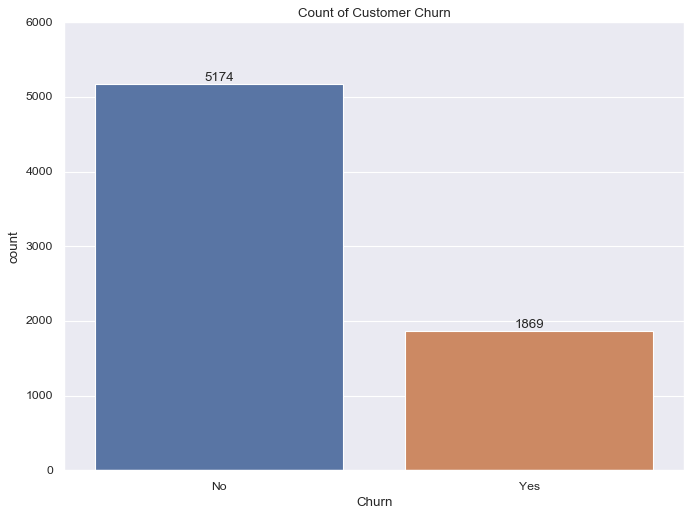

In [65]:
ax = sns.countplot(x = 'Churn', hue = 'Churn', data = df)
plt.title('Count of Customer Churn')
for bars in ax.containers:
    ax.bar_label(bars)

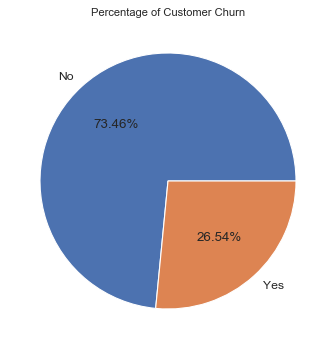

In [66]:
# plotting churn out percentage

plt.figure(figsize = (7,5))
gb = df.groupby('Churn').agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title('Percentage of Customer Churn', fontsize = 10)
plt.show()


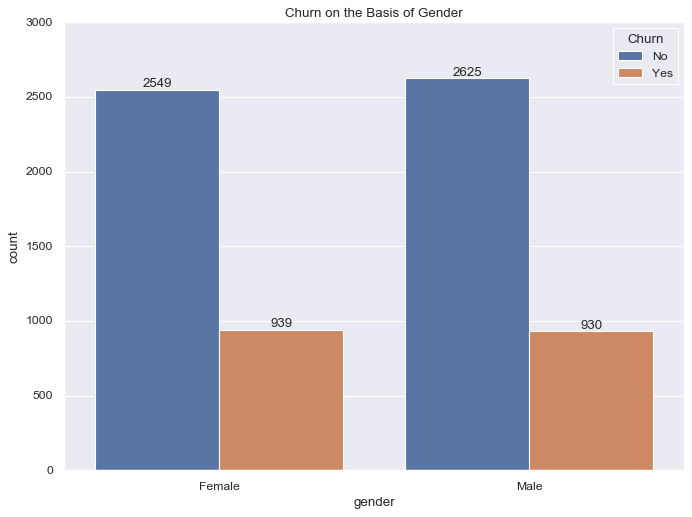

In [67]:
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Churn on the Basis of Gender')
plt.show()

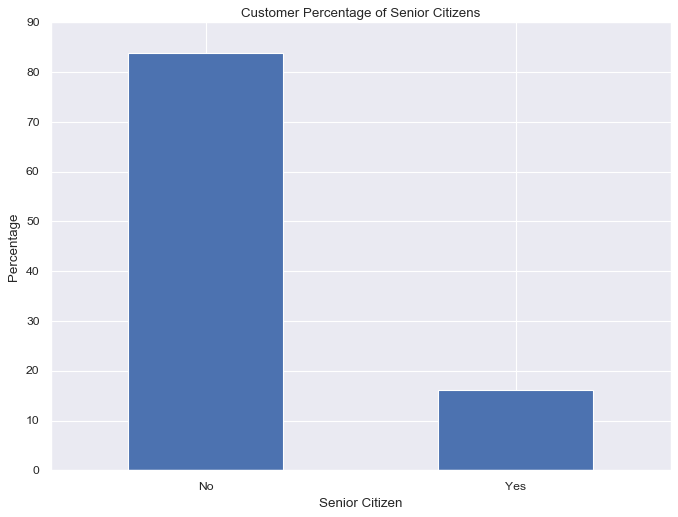

In [68]:
senior_citizen = df['SeniorCitizen'].value_counts(normalize = True)* 100

senior_citizen.plot(kind = 'bar')

plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.title('Customer Percentage of Senior Citizens')
plt.show()

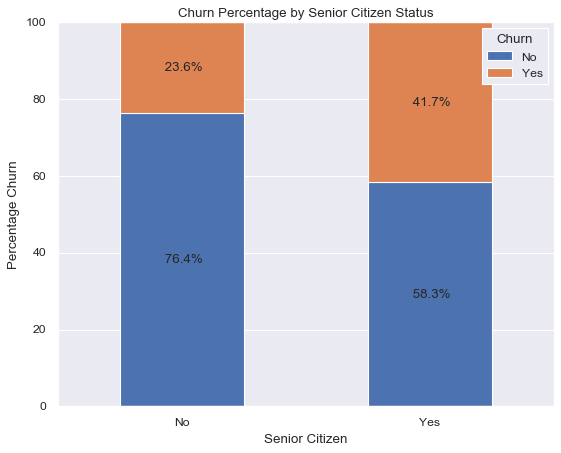

In [69]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

ax = total_counts.plot(kind='bar', stacked=True, figsize=(8,6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height : .1f}%', ha = 'center', va = 'center')

plt.xlabel('Senior Citizen')
plt.ylabel('Percentage Churn')
plt.title('Churn Percentage by Senior Citizen Status')
plt.legend(title = 'Churn', loc = 'upper right')
plt.xticks(rotation = 0)
plt.show()

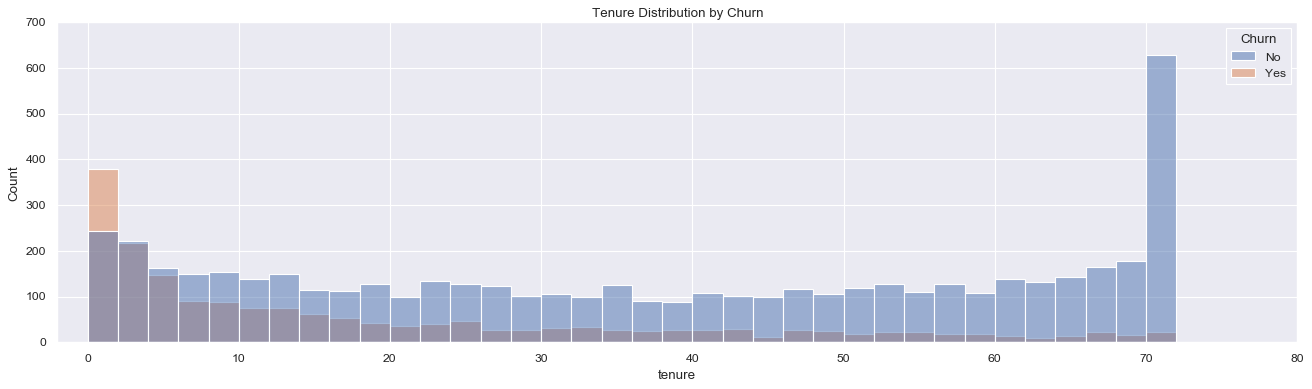

In [81]:
sns.set(rc = {'figure.figsize' : (20, 5)})
sns.histplot(x = 'tenure', data = df, hue = 'Churn', bins = 36)
plt.xlim(left=-2)
plt.title('Tenure Distribution by Churn')
plt.show()

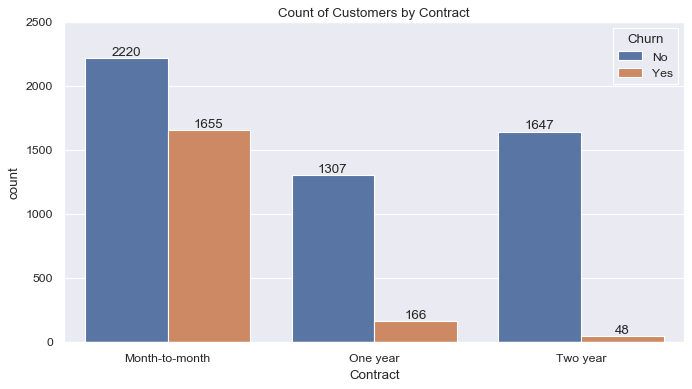

In [78]:
sns.set(rc = {'figure.figsize' : (10, 5)})

ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Contract')
plt.show()

In [83]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

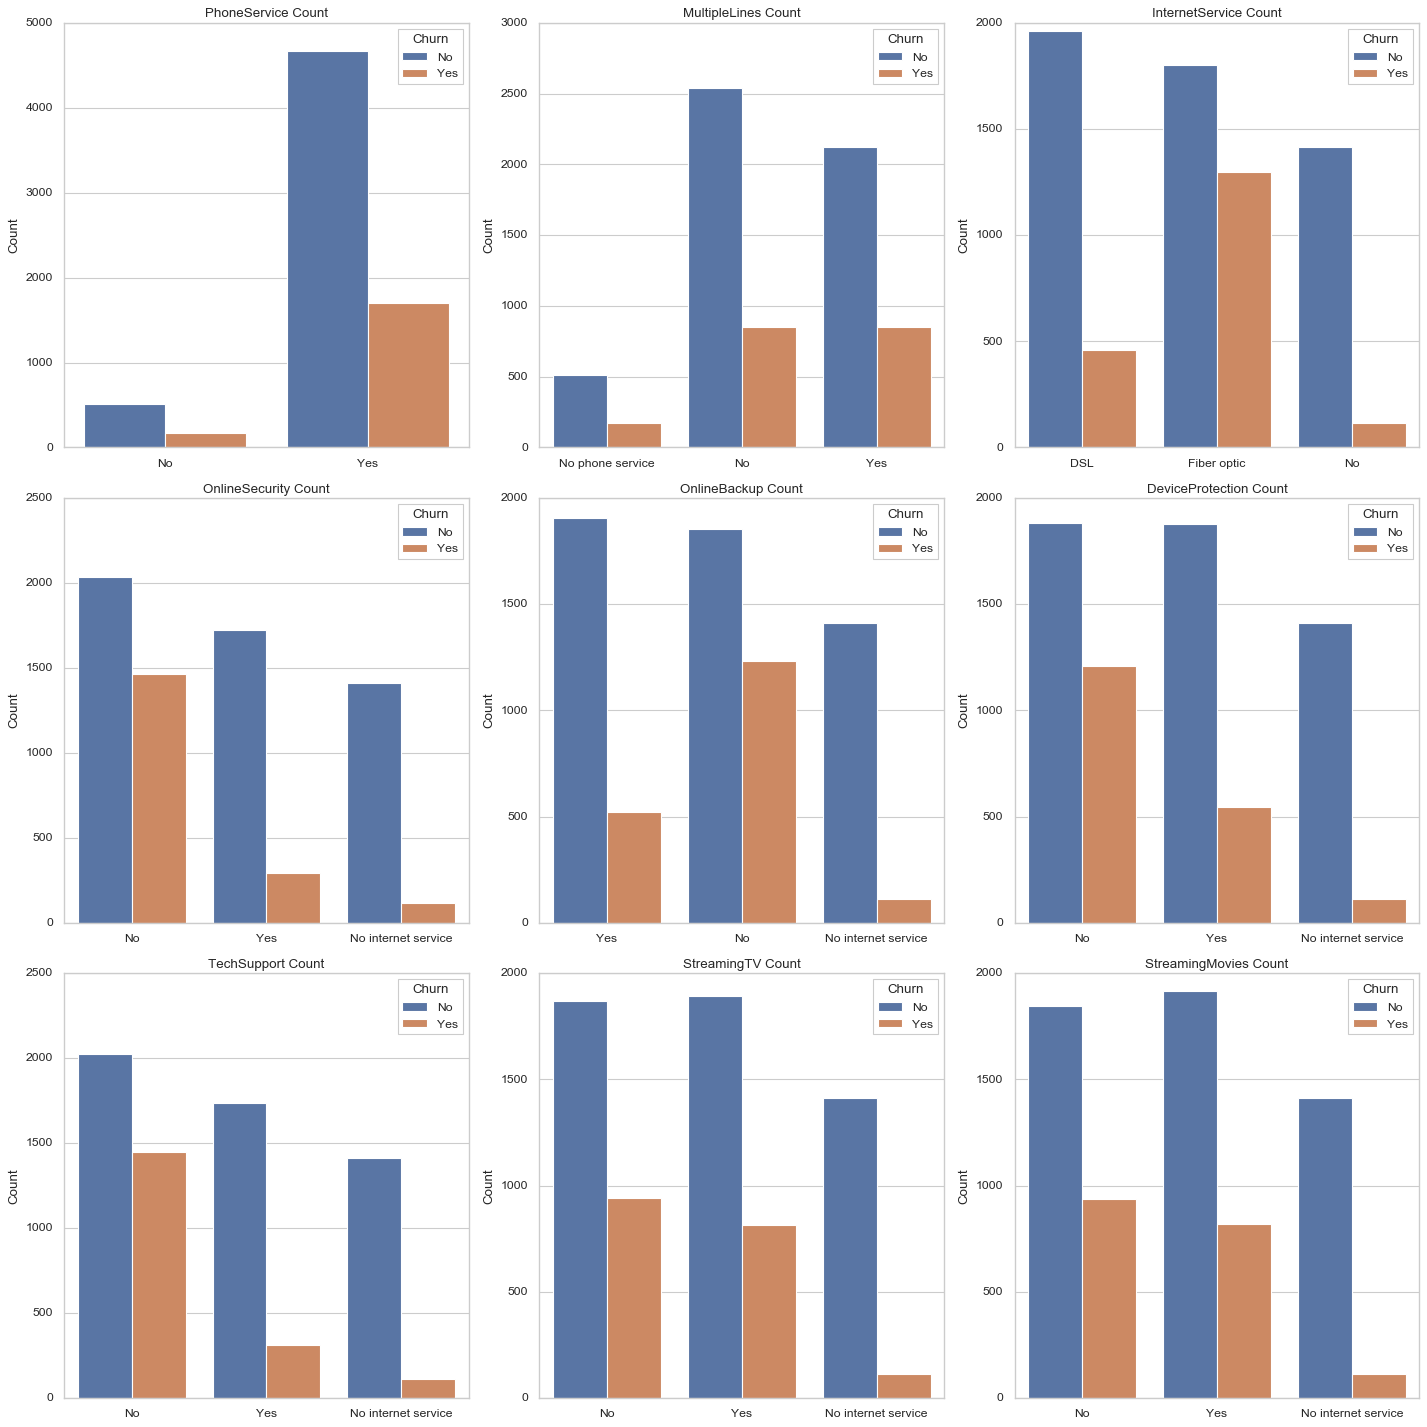

In [88]:
# List of categorical columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 18))

# Create subplots
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout
    sns.countplot(data = df, x = col, hue = 'Churn')
    plt.title(f'{col} Count')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


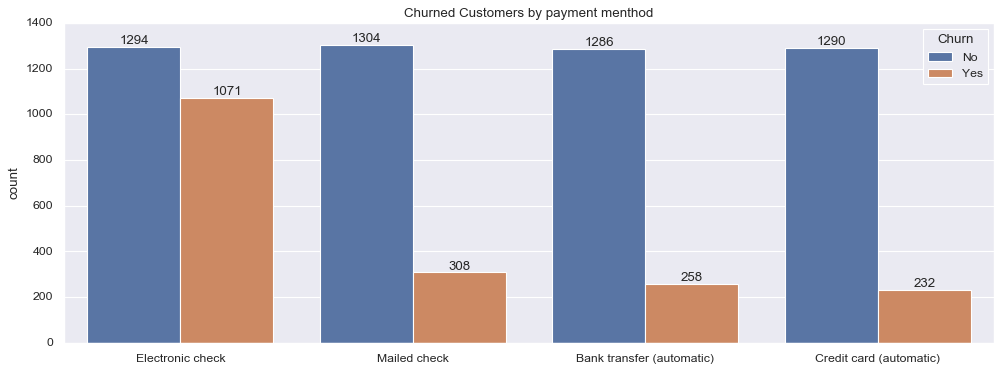

In [93]:
sns.set(rc = {'figure.figsize' : (15, 5)})

ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Churned Customers by payment menthod')
plt.xlabel('')
plt.show()